**Section 0 : Setting up the files**

**Step 1 : Importing the necessary file and mounting directory**

In [ ]:
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Polychain/assessment/Files')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 2 : All the cryptocurrency detail files are fetched fromhttps://coinmetrics.io/community-network-data/ and placed in the google drive**

In [ ]:
crypto_list = os.listdir()
finalCryptoCoinsList = pd.DataFrame(columns=['Currency_Name','CapMrktCurUSD']) #Columns in the website
step = 0
for i in crypto_list:
  step = step + 1
  temp = pd.DataFrame(pd.read_csv(i)) 
  i = i.replace(".csv", "")
  temp['Currency_Name'] = i
  finalCryptoCoinsList = finalCryptoCoinsList.append(temp)

**Step 2 : For the dates only on or after 01-01-2020**

In [ ]:
finalCryptoCoinsList = finalCryptoCoinsList[['date','Currency_Name','CapMrktCurUSD']]
finalCryptoCoinsList = finalCryptoCoinsList[finalCryptoCoinsList['date'] >= '2020-01-01'] 
datewiseSum = finalCryptoCoinsList.groupby(['date']).sum()

**Question 1 : Bitcoin**
Surge is seen in the December 2020 month

Text(0, 0.5, 'Percentage dominance (0-1)')

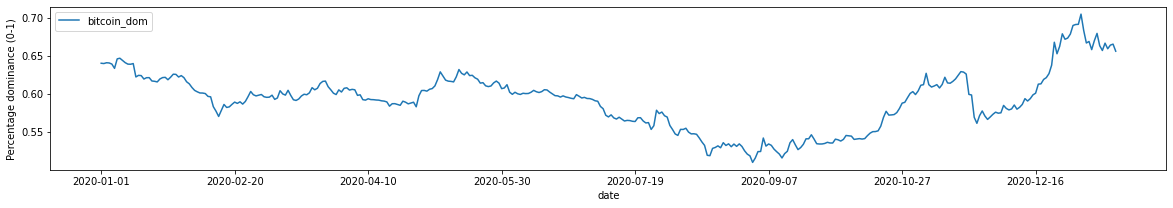

In [ ]:
finalBitCoinsList  = finalCryptoCoinsList[finalCryptoCoinsList['Currency_Name']=='btc'] #Filtering for bitcoin
finalBitCoinsListCompare = finalBitCoinsList.merge(datewiseSum, left_on='date', right_on='date')
finalBitCoinsListCompare['bitcoin_dom'] = finalBitCoinsListCompare['CapMrktCurUSD_x'] / finalBitCoinsListCompare['CapMrktCurUSD_y']
ax = finalBitCoinsListCompare.plot(figsize=(20,3), x="date", y=["bitcoin_dom"]) #plotting the result
ax.set_ylabel("Percentage dominance (0-1)")

**Question 2 : Tabulating Bitcoin and Ethereum - December 2020**

In [ ]:
#Filtering date for December 2020
finalBitCoinEthereumList = finalCryptoCoinsList[finalCryptoCoinsList['date'] >= '2020-12-01'] 
finalBitCoinEthereumList = finalBitCoinEthereumList[finalBitCoinEthereumList['date'] <= '2020-12-31']

#Setting bitcoin and ethereum dataframes separately
finalBitCoinListDec2020 = finalBitCoinEthereumList[finalBitCoinEthereumList['Currency_Name'] == 'btc']
finalBitCoinEthereumListDec2020 = finalBitCoinEthereumList[finalBitCoinEthereumList['Currency_Name'] == 'eth']

#Sorting the date column
finalBitCoinListDec2020 = finalBitCoinListDec2020.sort_values(by=['date'])
finalBitCoinEthereumListDec2020 = finalBitCoinEthereumListDec2020.sort_values(by=['date'])

#resetting the dataframe index
finalBitCoinListDec2020 = finalBitCoinListDec2020.reset_index()
finalBitCoinEthereumListDec2020 = finalBitCoinEthereumListDec2020.reset_index()

#Building the dictionary to print the final results for December 2020
question2_List = {}
for i in range(0,31):
  currentDate = finalBitCoinEthereumListDec2020["date"][i]
  question2_List[currentDate] = finalBitCoinEthereumListDec2020["CapMrktCurUSD"][i] / finalBitCoinListDec2020["CapMrktCurUSD"][i]

  #Please find the final dictionary in the variable - question2_List
question2_List

{'2020-12-01': 0.19141150631767642,
 '2020-12-02': 0.19090028065100123,
 '2020-12-03': 0.1942682799939972,
 '2020-12-04': 0.18709142868487635,
 '2020-12-05': 0.19065577556566426,
 '2020-12-06': 0.19060947784088675,
 '2020-12-07': 0.18902262394732394,
 '2020-12-08': 0.18517796034807227,
 '2020-12-09': 0.18942464367984968,
 '2020-12-10': 0.1877260463661344,
 '2020-12-11': 0.18508416074295303,
 '2020-12-12': 0.185216827934611,
 '2020-12-13': 0.18894622176431558,
 '2020-12-14': 0.1863913652985471,
 '2020-12-15': 0.18580401642283734,
 '2020-12-16': 0.18250666874597676,
 '2020-12-17': 0.17293037667933403,
 '2020-12-18': 0.17344788684313145,
 '2020-12-19': 0.16956442418625378,
 '2020-12-20': 0.16642876945420912,
 '2020-12-21': 0.16377467860683934,
 '2020-12-22': 0.1637204185032441,
 '2020-12-23': 0.15487240504220762,
 '2020-12-24': 0.15831888597106036,
 '2020-12-25': 0.15562671806546804,
 '2020-12-26': 0.14731476336138333,
 '2020-12-27': 0.15981506296486167,
 '2020-12-28': 0.16576800399318745

**Question 3 : Assume that we must calculate the ETHBTC ratio per minute (1,440 times per day), and insert the new ratio to a SQL database. How would you automate, and host this ETL workflow to run per minute and what services would you use?**

Answer to Question 3 : To achieve this, the website must be hit every single minute to pull the data. The following steps can be followed :-

Python code

Get the website or the location where the details about the cryptocurrency - bitcoin and Ethereum updates everyone minute
In a 2-step process - the first process would be to implement a python script in which we will be passing the start and end time paramters (1-minute diffrerence) and storing the previous startime and endtime accordingly and store the result in a dataframe.
Now we can automate the workflow which will first download the data from the given website for every 1-minute difference and load the data from the dataframe into the final table.

As this is a type 1 incremental load, our process will have the history and have the data for every job run.

Structure of Database table

Number of Columns : 3
Column names : Date with timestamp(Primary key), Value of bitcoin, Value of Ethereum
Deploying the code The python code and the database (Necessary table needed) need to be deployed in a production area after rigorous testing in a test environment and validating the records manually for the first time and automating the process. This same procedure can be deployed in our production servers as well.

This can be done by deploying the necesary workflows / jobs, tables through a git or jenkins